# Homework 7.2
    Matthew Schaelling
    Math 402
    November 15, 2017

In [19]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.linalg as la
plt.style.use('ggplot')
%matplotlib inline

### Problem 7.6

Sampling from the standard normal distribution $10^5$ times, calculate a Monte Carlo estimate of the value of $\int_{3}^{\infty} e^{\frac{-x^2}{2}} dx$, and estimate the standard error. Repeat the problem, smapling instead from $N(3,1)$, as in (7.3).

In [2]:
# using standard normal pdf
n = 10**5
samples = np.random.randn(n)
indicator = lambda x: x >= 3
h = lambda x: np.exp(-x**2 / 2)
stdnormpdf = stats.norm.pdf
# function k(x) from textbook
kx = indicator(samples) * h(samples) / stdnormpdf(samples)
estimate = kx.mean()
print("Estimate Using Normal(0,1):\t"+ str(estimate))
se = np.sqrt(np.sum((kx - estimate)**2))/n
print("Standard Error for Normal(3,1):\t" + str(se))

# using better normal pdf
n = 10**5
samples = stats.norm.rvs(size = n, loc = 3)
indicator = lambda x: x >= 3
h = lambda x: np.exp(-x**2 / 2)
kx = indicator(samples) * h(samples) / stats.norm.pdf(samples, loc=3)
estimate = kx.mean()
print("\nEstimate Using Normal(3,1):\t"+ str(estimate))
se = np.sqrt(np.sum((kx - estimate)**2))/n
print("Standard Error for Normal(3,1):\t" + str(se))

Estimate Using Normal(0,1):	0.00330874932251
Standard Error for Normal(3,1):	0.000287799527161

Estimate Using Normal(3,1):	0.00337019970357
Standard Error for Normal(3,1):	1.96352548407e-05


### Problem 7.7

Use importance sampling, drawing from $Beta(a,b)$ for various values of a and b, to estimate the integral $\int_{0}^{2\pi} \frac{dx}{x^3+x+1} $. Find values of $a$ and $b$ and sample size $n$ that will give a standard error less than $10^{-3}$

Hint: the support of $Beta(a,b)$ is $[0,1]$, but the integral is to be evaluated over $[0,2\pi]$; so you'll need to do a change of variables to be able to calculate this with samples from $Beta(a,b)$

In [3]:
a, b, n = 1,4,10**6
samples = stats.beta.rvs(a,b,size=n)*2*np.pi
h = lambda  x: 1./(x**3 + x + 1)
kx = h(samples)*np.pi*2/stats.beta.pdf(samples/(2*np.pi), a, b)
estimate = kx.mean()
print("Estimate Using Beta({},{}):\t".format(a,b) + str(estimate))
se = np.sqrt(np.sum((kx - estimate)**2))/n
print("Standard Error for Beta({},{}):\t".format(a,b) + str(se))

Estimate Using Beta(1,4):	0.908792609262
Standard Error for Beta(1,4):	0.000659228450276


### Problem 7.8

The c.d.f. of the exponential distribution Gamma$(1,\lambda)$, is  $F(x) = 1 - e^{-x/\lambda}$. Show that the inverse is  $F^{-1}(y) = -\lambda log(1-y)$. Also prove that if $Y \sim$  Unif(0,1), then $1-Y \sim$ Unif(0,1). Thus, a draw from the exponential distribution can be constructed by drawing $u$ from Unif(0,1) and computing .... Use your code to draw $10^5$ times from Gamma(1,2). Plot a normed histogram of your results, and on the same graph, plot the p.d.f. of the exponential distribution for comparison.

Proof of Inverse Function: <br>
$ y = 1 - e^{-x/\lambda} $ <br>
$ e^{-x/\lambda} = 1 - y$ <br>
$ -x/\lambda = log(1-y)$ <br>
$ x = -\lambda log(1-y) $ <br>
Thus, $F^{-1}(y) = -\lambda log(1-y) \blacksquare$ <br> 
<br>
Proof of Uniform: <br>
Because moment generating functions uniquely determine a distribution, we will show that for $Y~Unif(0,1)$, $1-Y~Unif(0,1)$ by demonstrating the MGFs are the same. <br>

First, for nonzero t. <br>
MGF for $Y$:
> $E[e^{tY}] = \frac{e^t - 1}{t}$ <br> <br>

MGF for $1-Y$:
> $E[e^{t(1-Y)}] = e^t E[e^{-tY}] = e^t * \frac{e^{-t} - 1}{-t} = \frac{1 - e^t}{-t} = \frac{e^t - 1}{t} $

Next, for zero t. <br>
MGF for $Y$:
> $E[e^{0Y}] = E[1] = 1$ <br> <br>

MGF for $1-Y$:
> $E[e^{0(1-Y)}] = E[1] = 1 $

Thus in all cases the moment generating functions are the same and $Y$ and $1-Y$ are distributed as Unif(0,1)

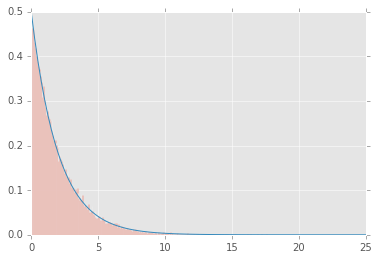

In [9]:
# scale = .5
lmbda = 2
U = np.random.random(10**5)
Finv = lambda x: -lmbda*np.log(x)
inversion_sample = Finv(U)
plt.hist(inversion_sample, normed=True, bins=1000)
x = np.linspace(0,25,100)
plt.plot(x, stats.gamma.pdf(x, 1, scale=lmbda))
plt.xlim(0,25)
plt.show()

### Problem 7.9

The $logistic\ distribution$ has p.d.f. $f(x) = \frac{e^{-x}}{(1+e^{-x})^2}$ and c.d.f. $F(x) = \frac{1}{1+e^{-x}}$. Compute the inverse of $F$. Code up the inversion sampling algorithm sampling from the logistic distribution, and use your code to draw from the logistic distribution $10^5$ times. Plot a normed histogram of your results, and on the same graph, plot the p.d.f. of the  distribution for comparison. Using your sample, estimate the mean and variance of the distribution.

Derivation of inverse of F:<br>
$ y = \frac{1}{1 + e^{-x}} $ <br>
$ e^{-x} = \frac{1}{y} - 1 $ <br>
$ x = -log(\frac{1}{y} - 1) $ <br>

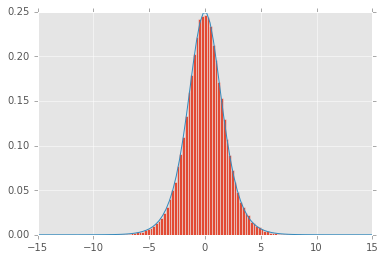

Sample Mean:		0.00185118553005
Sample Variance:	3.31246424769


In [18]:
U = np.random.random(10**5)
Finv = lambda x: -np.log((1./x) - 1)
samples = Finv(U)
pdf = lambda x: np.exp(-x)/((1 + np.exp(-x))**2)
x = np.linspace(-15,15,100)
plt.hist(samples, normed=True, bins=100)
plt.plot(x,pdf(x))
plt.show()
print("Sample Mean:\t\t{}\nSample Variance:\t{}".format(samples.mean(), np.var(samples)))

### Problem 7.10

Code up a method for estimating the volume of the unit ball in $d$-dimensional space using rejection sampling. Compute estimates for these values for $d = 1,...,10$ using enough samples to get a standard error less than $10^{-2}$.

In [31]:
n = 10**7
for d in range(1,11):
    samples = np.random.random((n,d))*2 - 1
    norms = la.norm(samples, axis=1)
    mask = norms <= 1
    stderr = np.std(mask)
    if d==1:
        print("d={}\testimate: {}\t\tstandard error: {}".format(d,mask.mean()*2**d,stderr))
    else:
        print("d={}\testimate: {}\tstandard error: {}".format(d,mask.mean()*2**d,stderr))

d=1	estimate: 2.0		standard error: 0.0
d=2	estimate: 3.1416236	standard error: 0.410540463591
d=3	estimate: 4.1880776	standard error: 0.499446988184
d=4	estimate: 4.9319136	standard error: 0.461768195712
d=5	estimate: 5.2644864	standard error: 0.370742429416
d=6	estimate: 5.1726016	standard error: 0.272561406807
d=7	estimate: 4.721792	standard error: 0.188489261442
d=8	estimate: 4.0538112	standard error: 0.124837680373
d=9	estimate: 3.3174528	standard error: 0.0802335177818
d=10	estimate: 2.5498624	standard error: 0.0498387339525


### Problem 7.11

Let P be a distribution on $[0,\infty)$ with p.d.f. equal to $f_P(x) = \frac{1}{Z} e^{-x^2-x^3}$ for some constant $Z > 0$ (the constant is $Z = \int_{0}^{\infty} f_P(x) dx$. Use rejection sampling with proposal distribution $Q\sim$ Gamma(1,1) to sample from this distribution as follows:

(i)   Find the smallest $M$ for which $e^{-x^2-x^3} \leq Me^{-x}$ for all $x \in [0,\infty)$. 

(ii)  Show that the smallest $M$ for which $f_P(x) \leq mf_Q(x)$ is the same as $M$ found in (i)

(iii) Code up a rejection sampler that draws $z$ from Gamma(1,1) (using either the sampler you wrote for 7.8 or another sampler), draws $u$ from Unif([0,1]), and rejects any $z$ such that the corresponding $u$ is greater than $\frac{1}{M}e^{z - z^2 - z^3}$.

(iv)  Use your sampling method to draw $10^5$ times from $P$ , and plot a normed histogram of the results, along with a plot of the p.d.f. $\ f_P(x)\ $ (this last plot will require you to approximate $\ Z$

Part (i):
> $e^{-x^2 - x^3} \leq me^{-x}$ if and only if $e^{x-x^2-x^3} \leq m$ <br>
$e^{x-x^2-x^3}$ has a maximum of $e^{5/27}$ at $x=\frac{1}{3}$ so $m=e^{5/27}$

Part (ii)
> $f_Q(x) = e^{-x}$ so $\frac{e^{-x^2 - x^3}}{Z} \leq Me^{-x}$ if $M=\frac{m}{Z}$ by Part (i) <br>
Thus $\frac{f_P(x)}{Mf_Q(x)} = \frac{\frac{e^{-x^2 - x^3}}{Z}}{\frac{m}{Z}e^{-x}} = \frac{e^{-x^2 - x^3}}{me^{-x}} $

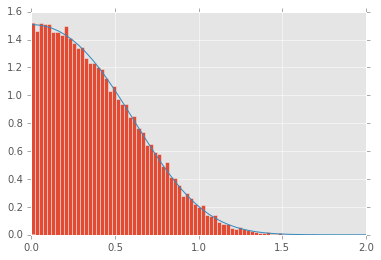

In [37]:
## Part iii
# first sample from Gamma(1,1)
unif = np.random.random(10**5)
Finv = lambda x: -np.log(x)
z = Finv(unif)

# sample uniformly
u = np.random.random(10**5)

# keeps samples according to algorithmic rule
function = lambda x: np.exp(x-x**2-x**3)/np.exp(5./27)
mask = u < function(z)
z = z[mask]


## Part iv
# Estimate of Z from Wolfram Alpha is .663711
plt.hist(z, normed=True, bins=70)
Z = .663711
fP = lambda x: np.exp(-x**2 - x**3)/Z
domain = np.linspace(0,2)
plt.plot(domain, fP(domain))
plt.show()